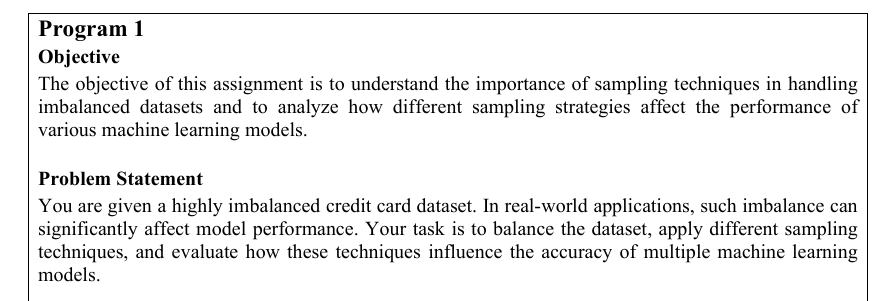

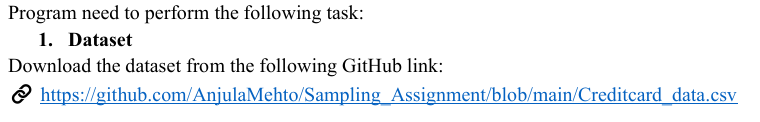

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
data = pd.read_csv(url)

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class(Target Column) renamed to Fraud_label for better understanding

In [3]:
data.rename(columns={'Class':'Fraud_Label'}, inplace=True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud_Label
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



2. Convert this data-set into balanced class data-set.

In [5]:
from sklearn.utils import resample
import pandas as pd

# Separate majority and minority classes
majority = data[data.Fraud_Label == 0]
minority = data[data.Fraud_Label == 1]

print("Before Balancing:")
print("Majority class (Non-Fraud):", majority.shape[0])
print("Minority class (Fraud):", minority.shape[0])

Before Balancing:
Majority class (Non-Fraud): 763
Minority class (Fraud): 9


In [11]:
#Downsampling the majority class
majority_downsampled = resample(
    majority,
    replace=False,
    n_samples=len(minority),
    random_state=40
)

In [12]:
balanced_data = pd.concat([majority_downsampled, minority])

print("\nAfter Balancing:")
print("Non-Fraud samples:", balanced_data[balanced_data.Fraud_Label == 0].shape[0])
print("Fraud samples:", balanced_data[balanced_data.Fraud_Label == 1].shape[0])
print("Total samples:", balanced_data.shape[0])


After Balancing:
Non-Fraud samples: 9
Fraud samples: 9
Total samples: 18


In [10]:
print("\nClass Distribution:")
print(balanced_data.Fraud_Label.value_counts())


Class Distribution:
Fraud_Label
0    9
1    9
Name: count, dtype: int64


3. Create five samples  

In [13]:
#Sample1: Simple Random Sampling
sample1 = balanced_data.sample(frac=0.9, random_state=43)

print("\nSampling 1: Simple Random Sampling")
print("Sample shape:", sample1.shape)
print("Class distribution:\n", sample1.Fraud_Label.value_counts())


Sampling 1: Simple Random Sampling
Sample shape: (16, 31)
Class distribution:
 Fraud_Label
1    9
0    7
Name: count, dtype: int64


In [34]:
#Sample2: Systematic Sampling
k = 6
sys_majority = balanced_data[balanced_data.Fraud_Label == 0].iloc[::k, :]
sys_minority = balanced_data[balanced_data.Fraud_Label == 1].iloc[::k, :]
sample2 = pd.concat([sys_majority, sys_minority])

print("\nSample-2 Systematic Sampling")
print(sample2.shape)
print(sample2.Fraud_Label.value_counts())


Sample-2 Systematic Sampling
(4, 32)
Fraud_Label
0    2
1    2
Name: count, dtype: int64


In [35]:
#Sample3: Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=40)

for train_idx, test_idx in split.split(balanced_data, balanced_data.Fraud_Label):
    sample3 = balanced_data.iloc[train_idx]

print("\nSampling 3: Stratified Sampling")
print("Sample shape:", sample3.shape)
print("Class distribution:\n", sample3.Fraud_Label.value_counts())


Sampling 3: Stratified Sampling
Sample shape: (12, 32)
Class distribution:
 Fraud_Label
1    6
0    6
Name: count, dtype: int64


In [36]:
#Sample4: Cluster Sampling
balanced_data['Cluster'] = pd.qcut(balanced_data['Amount'], q=5, labels=False)

sample4 = balanced_data.groupby('Cluster').sample(frac=0.7, random_state=40)

print("\nSampling 4: Cluster Sampling")
print("Sample shape:", sample4.shape)
print("Class distribution:\n", sample4.Fraud_Label.value_counts())



Sampling 4: Cluster Sampling
Sample shape: (13, 32)
Class distribution:
 Fraud_Label
0    8
1    5
Name: count, dtype: int64


In [37]:
#Sample5: Bootstrap Sampling
sample5 = balanced_data.sample(
    frac=1,
    replace=True,
    random_state=40
)

print("\nSampling 5: Bootstrap Sampling")
print("Sample shape:", sample5.shape)
print("Class distribution:\n", sample5.Fraud_Label.value_counts())


Sampling 5: Bootstrap Sampling
Sample shape: (18, 32)
Class distribution:
 Fraud_Label
0    10
1     8
Name: count, dtype: int64


In [38]:
#Sample6: Cross Fold Validation Sampling
from sklearn.model_selection import StratifiedKFold
X_cv = balanced_data.drop(['Fraud_Label','Cluster'], axis=1, errors='ignore')
y_cv = balanced_data['Fraud_Label']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)

print("\nSample-6 (Cross-Validation)")
print("Number of folds:", cv.get_n_splits())


Sample-6 (Cross-Validation)
Number of folds: 5


4. Apply five different sampling techniques (Sampling1, Sampling2, Sampling3, Sampling4,
Sampling5) on five different ML models (M1, M2, M3, M4 and M5)

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [60]:
def get_models(train_size):
    return {
        "LogisticRegression": LogisticRegression(max_iter=1000),
        "DecisionTree": DecisionTreeClassifier(),
        "RandomForest": RandomForestClassifier(),
        "SVM": SVC(),
        "KNN": KNeighborsClassifier(n_neighbors=min(3, train_size - 1))
    }

In [61]:
Results = pd.DataFrame(
    index=["LogisticRegression", "DecisionTree", "RandomForest", "SVM", "KNN"],
    columns=[
        "Sample-1 Simple Random",
        "Sample-2 Systematic",
        "Sample-3 Stratified",
        "Sample-4 Cluster",
        "Sample-5 Bootstrap",
        "Sample-6 Cross-Validation"
    ]
)

In [66]:
samples = {
    "Sample-1 Simple Random": sample1,
    "Sample-2 Systematic": sample2,
    "Sample-3 Stratified": sample3,
    "Sample-4 Cluster": sample4,
    "Sample-5 Bootstrap": sample5
}

for sample_name, sample in samples.items():

    X = sample.drop(['Fraud_Label', 'Cluster'], axis=1, errors='ignore')
    y = sample['Fraud_Label']

    if y.nunique() < 2 or y.value_counts().min() < 2:
        continue

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.4,
        random_state=40,
        stratify=y
    )

    models = get_models(len(X_train))

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))
        Results.loc[model_name, sample_name] = round(acc * 100, 2)


In [67]:
X_cv = balanced_data.drop(['Fraud_Label', 'Cluster'], axis=1, errors='ignore')
y_cv = balanced_data['Fraud_Label']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf = RandomForestClassifier()

cv_scores = cross_val_score(rf, X_cv, y_cv, cv=cv, scoring='accuracy')

Results.loc["RandomForest", "Sample-6 Cross-Validation"] = round(cv_scores.mean() * 100, 2)


In [69]:
print("\nAccuracy Comparison Table")
print(Results.to_string())


Accuracy Comparison Table
                   Sample-1 Simple Random Sample-2 Systematic Sample-3 Stratified Sample-4 Cluster Sample-5 Bootstrap Sample-6 Cross-Validation
LogisticRegression                  28.57                50.0                20.0            66.67               75.0                       NaN
DecisionTree                        28.57                50.0                20.0            66.67               87.5                       NaN
RandomForest                        57.14               100.0                80.0            66.67               75.0                     48.33
SVM                                 57.14                50.0                40.0            66.67               75.0                       NaN
KNN                                 71.43                50.0                20.0             50.0               37.5                       NaN


5. Determine which sampling technique gives higher accuracy on which model.

In [74]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)

print("\nAccuracy Comparison Table")
print(Results.to_string())


Accuracy Comparison Table
                   Sample-1 Simple Random Sample-2 Systematic Sample-3 Stratified Sample-4 Cluster Sample-5 Bootstrap Sample-6 Cross-Validation
LogisticRegression                  28.57                50.0                20.0            66.67               75.0                       NaN
DecisionTree                        28.57                50.0                20.0            66.67               87.5                       NaN
RandomForest                        57.14               100.0                80.0            66.67               75.0                     48.33
SVM                                 57.14                50.0                40.0            66.67               75.0                       NaN
KNN                                 71.43                50.0                20.0             50.0               37.5                       NaN


In [75]:
print(" Best Sampling Technique for Each Model\n")

for model in Results.index:
    best_sampling = Results.loc[model].idxmax()
    best_accuracy = Results.loc[model].max()

    print(f"{model} → {best_sampling} with Accuracy = {best_accuracy}%")

 Best Sampling Technique for Each Model

LogisticRegression → Sample-5 Bootstrap with Accuracy = 75.0%
DecisionTree → Sample-5 Bootstrap with Accuracy = 87.5%
RandomForest → Sample-2 Systematic with Accuracy = 100.0%
SVM → Sample-5 Bootstrap with Accuracy = 75.0%
KNN → Sample-1 Simple Random with Accuracy = 71.43%


In [76]:
#Overall Best Model
best_model, best_sampling = Results.stack().idxmax()
best_accuracy = Results.stack().max()

print("Overall Best Model:", best_model)
print("Best Sampling Technique:", best_sampling)
print("Highest Accuracy Achieved:", best_accuracy, "%")

Overall Best Model: RandomForest
Best Sampling Technique: Sample-2 Systematic
Highest Accuracy Achieved: 100.0 %
